In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
#import mlxtend
#from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

# Generating synthetic datasets that form concentric circles

In [9]:
#Your Code Here 
#You have to use make_cirlces that have 100 samples and noise 0.1 with random state 1 functions
X, y = make_circles(n_samples = 100, noise=0.1,random_state=1)


<function matplotlib.pyplot.show(close=None, block=None)>

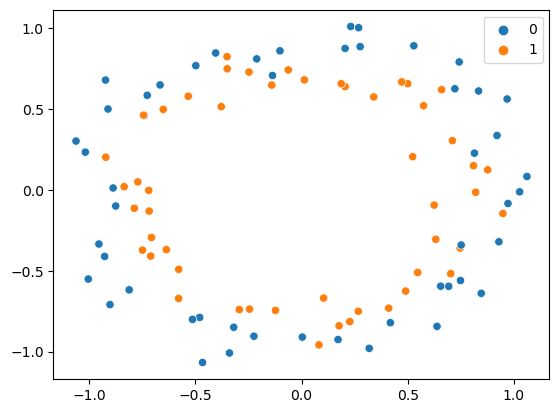

In [14]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show

# Split your dataset 

In [15]:
#Split your dataset into training and testing sets, ensuring that 20% of the data is kept aside for testing purposes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)


# Build a simple neural network model

In [28]:
# Specify the neuraon = 256 input dimension and activation funtions
#one input layer and one output layer
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation


neurons=256
output_func='softmax'
activation_func='relu'
model = Sequential()
model.add(Dense(neurons, activation = 'relu'))
model.add(Dense(1, activation='relu'))


# Compile it

In [29]:
#Choose the loss, optimizer and accuracy matrices
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics =  ['accuracy'])

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

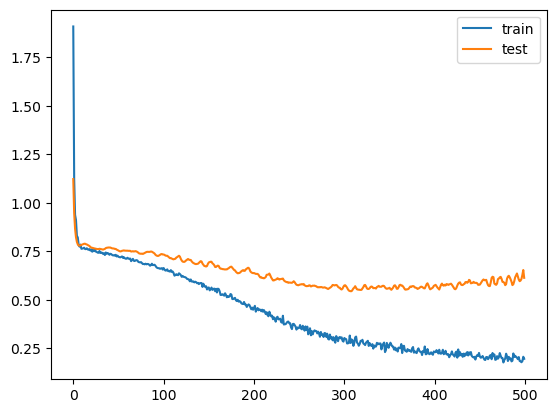

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [37]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 656.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 1.2 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 2.4 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.4 MB 4.0 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.4 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 363us/step


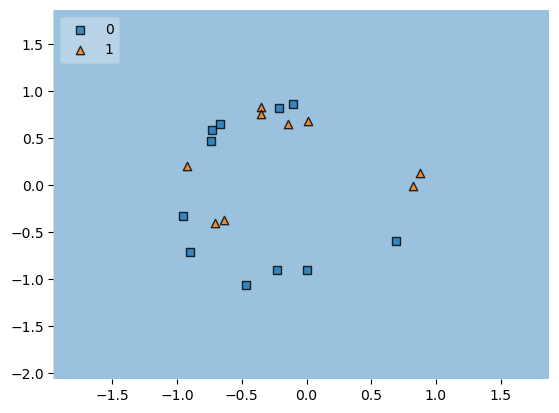

In [38]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [39]:
#Repeat your same model neural network model
neurons=256
output_func='softmax'
activation_func='relu'
model = Sequential()
model.add(Dense(neurons, activation = 'relu'))
model.add(Dense(1, activation='relu'))


In [40]:
#Comple it
#Choose the loss, optimizer and accuracy matrices
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics =  ['accuracy'])

In [46]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [47]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=callback)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5367 - loss: 3.9551 - val_accuracy: 0.5500 - val_loss: 1.3183
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4781 - loss: 2.1493 - val_accuracy: 0.5500 - val_loss: 0.9617
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4859 - loss: 1.2113 - val_accuracy: 0.5500 - val_loss: 0.8681
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4547 - loss: 1.1133 - val_accuracy: 0.5500 - val_loss: 0.8144
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4586 - loss: 1.0234 - val_accuracy: 0.5500 - val_loss: 0.7800
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4859 - loss: 0.9187 - val_accuracy: 0.5500 - val_loss: 0.7570
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4273 - loss: 0.9413 - val_accuracy: 0.5500 - val_loss: 0.7412
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4742 - loss: 0.9096 - val_accuracy: 0.5500 - val_loss: 0.730

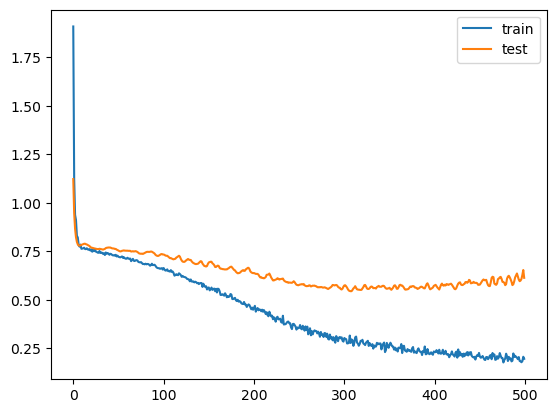

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 370us/step


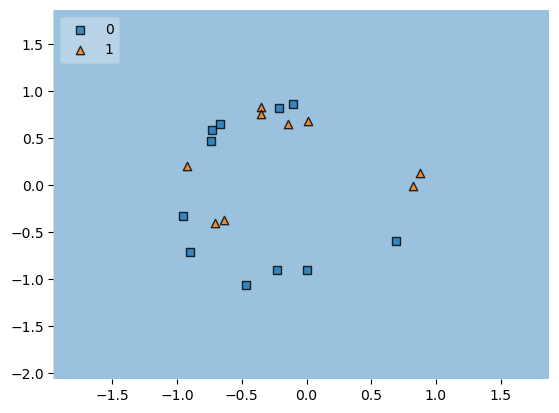

In [43]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()